## 1. Beta and its estimation
Beta measures a stock's or portfolio's sensitivity to market movements, indicating how it reacts relative to the overall market.
- Portfolio managers use beta estimation to better understand and control risk.
- Accurate beta estimation helps determine if a strategy's performance comes in excess of market returns.



### 1.1. Rolling OLS: A Benchmark Method
The Rolling OLS method computes beta using a fixed-size rolling window Ordinary Least Squares regression of historical data. 
- While straightforward and widely used, its reliance on static windows limits its adaptability to rapidly changing relationships.


### 1.2. One-dimensional Kalman Filter for Beta Estimation
The Kalman Filter is a relatively simple recursive algorithm that continuously incorporates estimation errors and noise from previous steps into its next update.
- By refeeding these uncertainties in each iteration, it effectively adjusts the estimates of unknown variables while minimizing mean square error. 
- This makes it particularly well-suited for noisy time-series data (i.e. market prices), where the underlying relationships can shift over time. 
- In financial beta estimation, the Kalman Filter’s adaptability allows it to detect and respond to rapid changes in market conditions more effectively than traditional static methods.


####  1.2.1 Advantages of the Kalman Filter:
- **"Real-Time" Updates**: The Kalman Filter updates beta estimates with each new data point, making it ideal for live trading environments, not taking the system "memory" as much into account as traditional approaches.
- **Flexibility**: Allows modeling of dynamic relationships, capturing time-varying betas.
- **Smoothness vs Reactivity**: Hyperparameters control how quickly the filter reacts to changes, balancing noise suppression with sensitivity to true changes.
- **Computational Efficiency**: Relatively simplistic algorithm



### 1.3. Research Framework
Two methods were evaluated based on:
1. **Beta Estimation Accuracy**: Visual and statistical comparison of beta trajectories for selected assets.
2. **Sensitivity to Market Dynamics**: Observing how beta estimates respond to sudden market changes.
3. **Computational Performance**: Measuring execution time for large datasets and repeated calculations.
4. **Possible Optimizations**

----

## 2. Beta estimation in practice

In [1]:
# Import (install if needed) necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from cycler import cycler

from src.beta import kalman_beta, rolling_ols_beta

# Plot settings
colors = [
    '#e16235',
    '#000000',
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd'
]

plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (12, 6)


- Here, we download historical price data for selected tickers from Yahoo Finance.
- The data includes closing prices, which are transformed into daily returns for analysis.
- The benchmark (S&P 500) is separated from asset returns to compute betas against the market index.

In [2]:
# Fetch data from Yahoo Finance and calculate returns
tickers = [
    "JPM", "^GSPC", "GLD", "WMT", "AAPL", "BRK-B", "BIL"
]

data = yf.download(tickers)

close = data["Close"].copy().dropna(subset=["^GSPC"])
returns = close.ffill().pct_change(fill_method=None)

assets = returns[["JPM", "GLD", "WMT", "AAPL", "BRK-B", "BIL"]].copy()
sp500 = returns["^GSPC"].copy()

assets.dropna(how="all", inplace=True)	


[*********************100%***********************]  7 of 7 completed


### Running the main functions

- These functions efficiently compute betas using both methods, feel free to explore their definitions in beta.py

---

### Chosen Parameters
#### These parameters give us similar results for both methods
- Kalman filter: Q=1e-3; R=1e-4
- Rolling OLS: 63 days moving window (3 months)

In [3]:
# Calculate betas using both methods
kalman_betas = kalman_beta(sp500, assets, convergence_period=252).dropna(how="all")
rolling_betas = rolling_ols_beta(sp500, assets, window=63).dropna(how="all")

100%|██████████| 6/6 [00:04<00:00,  1.42it/s]


In [4]:
kalman_betas.dropna()

Ticker           JPM       GLD       WMT      AAPL     BRK-B       BIL
Date                                                                  
2008-05-30  1.777306 -0.355285  0.500678  1.285731  0.305393 -0.006079
2008-06-02  1.781222 -0.362770  0.515268  1.287635  0.379541 -0.008732
2008-06-03  1.772946 -0.334036  0.489392  1.280581  0.338733 -0.008631
2008-06-04  1.773599 -0.333716  0.489555  1.280645  0.341836 -0.008605
2008-06-05  1.627974 -0.307465  0.659707  1.267686  0.307349 -0.011650
...              ...       ...       ...       ...       ...       ...
2024-12-27  1.161657  0.331699  0.467905  0.762474  0.633587  0.001554
2024-12-30  1.143696  0.330340  0.493876  0.781726  0.643954  0.001491
2024-12-31  1.133620  0.318538  0.494358  0.787448  0.635875  0.001144
2025-01-02  1.130555  0.306793  0.496638  0.807564  0.638664  0.000962
2025-01-03  1.127968  0.253922  0.507506  0.752651  0.626983  0.001401

[4178 rows x 6 columns]

In [5]:
rolling_betas.dropna()

Ticker           JPM       GLD       WMT      AAPL     BRK-B       BIL
Date                                                                  
2007-08-28  1.279006  0.240596  0.964458  1.004757  0.288828  0.000687
2007-08-29  1.242780  0.243617  0.957142  1.088805  0.258725  0.001864
2007-08-30  1.242509  0.238483  0.944502  1.097083  0.258995  0.001849
2007-08-31  1.244789  0.249235  0.932093  1.092808  0.233296  0.001258
2007-09-04  1.252630  0.261866  0.909706  1.132666  0.245878  0.001088
...              ...       ...       ...       ...       ...       ...
2024-12-27  1.411864  0.168240  0.418037  0.762446  0.790404 -0.000275
2024-12-30  1.401170  0.179730  0.437105  0.763551  0.789206  0.000332
2024-12-31  1.375842  0.202529  0.462533  0.709863  0.785347  0.000415
2025-01-02  1.374141  0.192471  0.464616  0.728320  0.787083  0.000382
2025-01-03  1.352254  0.161544  0.467810  0.689596  0.771823  0.000168

[4368 rows x 6 columns]

#### Plot both


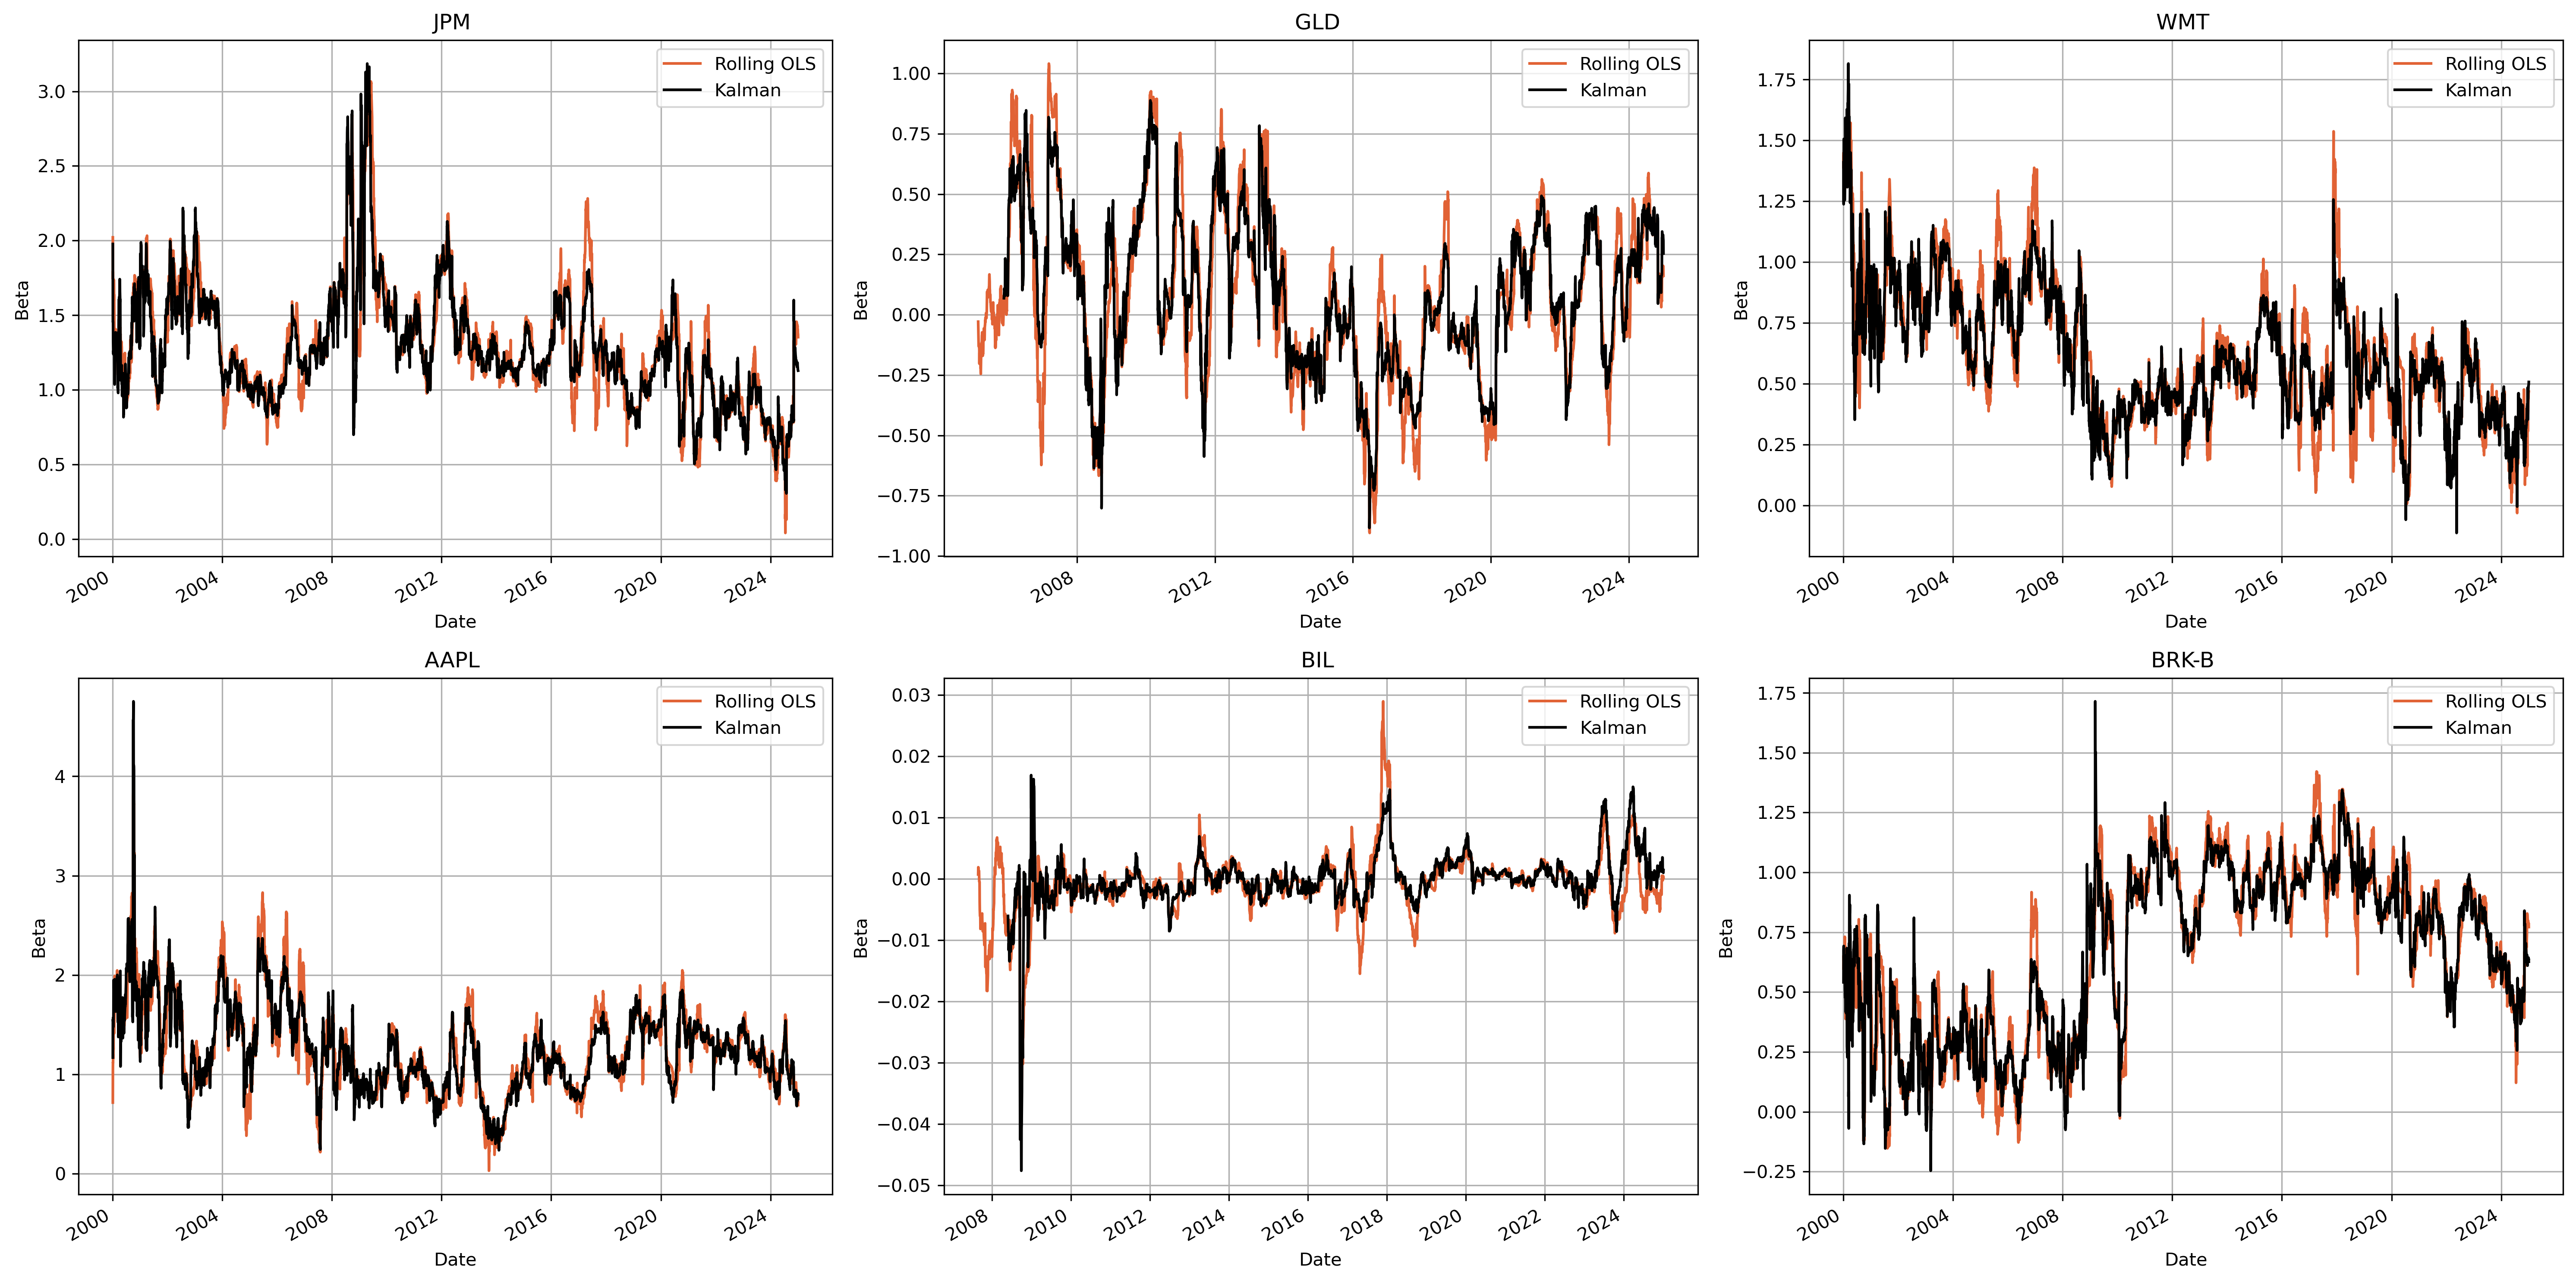

In [20]:

df = (
    pd.merge(
        kalman_betas, 
        rolling_betas, 
        suffixes=("_kalman", "_ols"), 
        left_index=True, 
        right_index=True)
)

tickers = ["JPM", "GLD", "WMT", "AAPL", "BIL","BRK-B"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=False)
axes = axes.flatten()

for ax, ticker in zip(axes, tickers):
    df[[f"{ticker}_ols", f"{ticker}_kalman"]].loc['2000':].plot(ax=ax)
    ax.set_title(f"{ticker} ")
    ax.set_ylabel("Beta")
    ax.legend(["Rolling OLS", "Kalman"], loc="best")
    ax.grid(True)

plt.tight_layout()
plt.show()


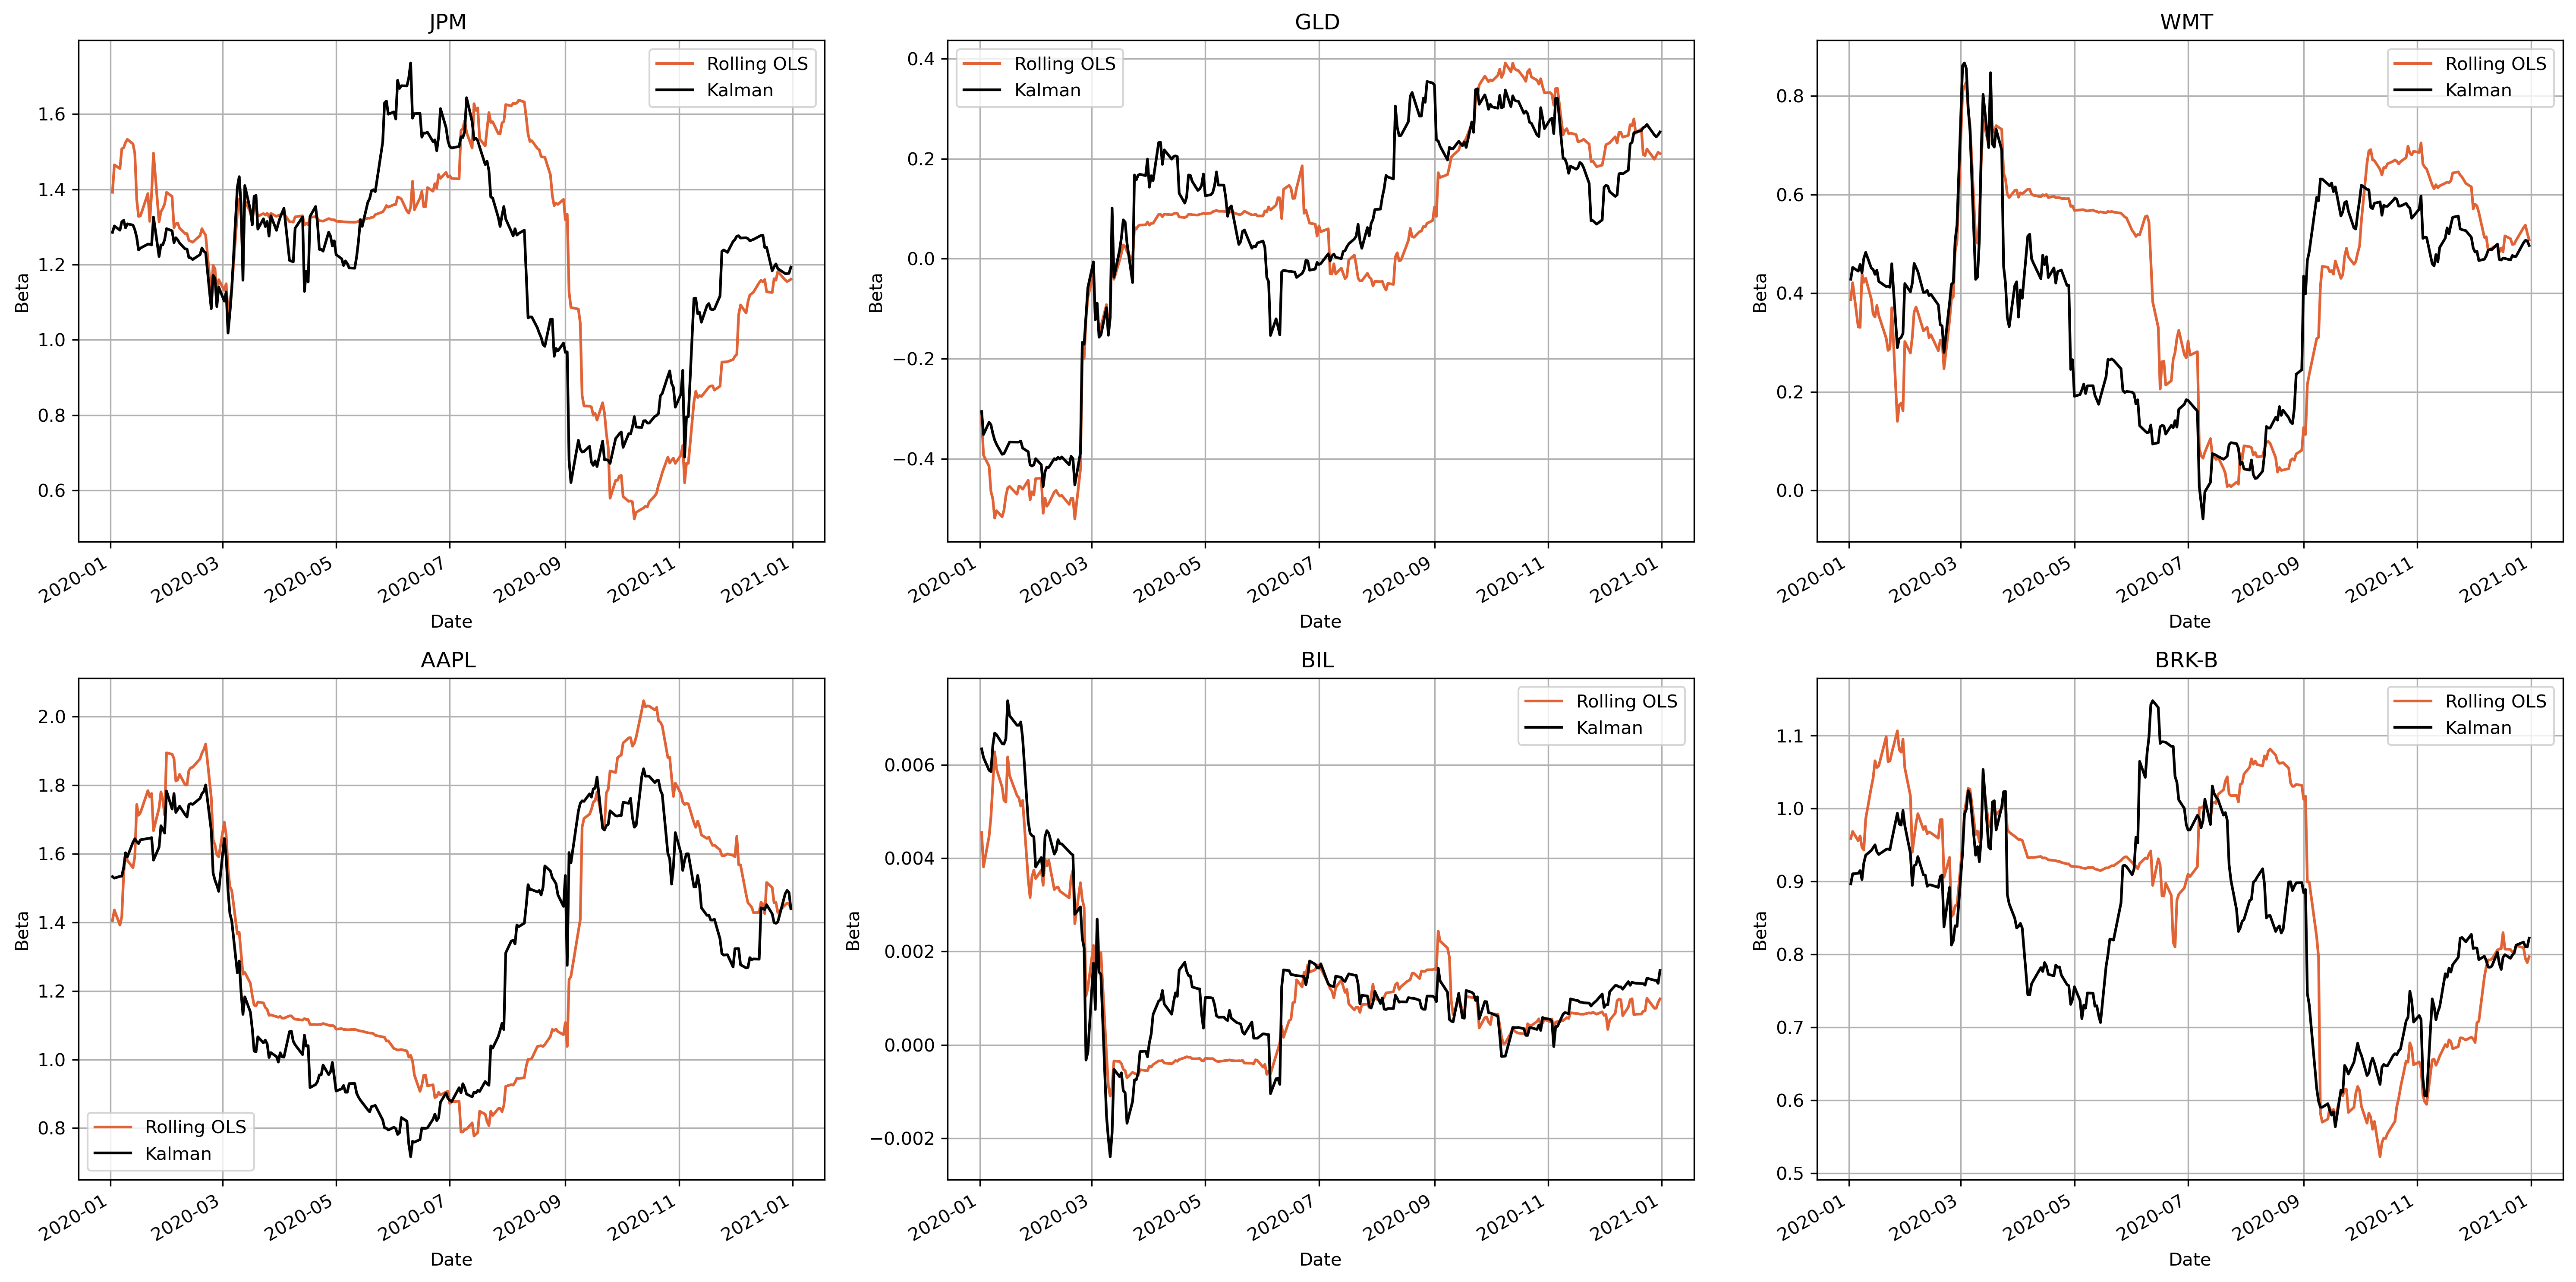

In [7]:

df_ = df.loc['2020']
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=False)
axes = axes.flatten()

for ax, ticker in zip(axes, tickers):
    df_[[f"{ticker}_ols", f"{ticker}_kalman"]].loc['2000':].plot(ax=ax)
    ax.set_title(f"{ticker} ")
    ax.set_ylabel("Beta")
    ax.legend(["Rolling OLS", "Kalman"], loc="best")
    ax.grid(True)
    
# Adjust layout for clarity
plt.tight_layout()
plt.show()

### From the above plots we can see the following:
1. Both methods are close from one another
2. The Kalman filter tends to "react faster", with OLS tending to adapt "slower"
3. This is mainly due to the nature of the Rolling OLS beta having many data points in its estimation (63 in this example)

----

## 2. Computing a portfolio's returns in excess of the market's return

- Knowing assets' betas is useful, but what can you do with this information?
- The return of a portfolio in excess of the market returns means you short your estimated beta in the form of your market benchmark's ETF or future (i.e., SPY, ES_F).
- This essentially "filters out" the beta from your return series, leaving it with a near-zero beta.
- "Near-zero" mainly because of the noisy nature of the process, and you can only effectively use a lagged beta (i.e., short today's estimation tomorrow, that's what will be done here).
- Nevertheless, the mean beta of the resulting series will be very close to zero.
- We're essentially hedged against our own beta (that's what I'm calling it going forward).

### 2.1 Build an equally weighted portfolio and estimate its beta
- Then subtract beta times the benchmark's returns from the portfolio returns series


In [8]:
portfolio_returns = assets.loc['2000':].stack().copy()
equal_weights = 1/portfolio_returns.groupby('Date').count()
portfolio_returns = (portfolio_returns * equal_weights).groupby('Date').sum().rename('Portfolio Returns')	
cumulative_returns = portfolio_returns.loc['2005':].add(1).cumprod().mul(100)

In [9]:
# Calculate the portfolio beta
portfolio_kalman_beta = kalman_beta(sp500, portfolio_returns).dropna(how="all").rename('kalman_beta')
portfolio_rolling_beta = rolling_ols_beta(sp500, portfolio_returns, window=63).dropna(how="all").squeeze().rename('rolling_beta')

100%|██████████| 1/1 [00:00<00:00, 36.31it/s]


<Axes: title={'center': 'Portfolio Beta'}, xlabel='Date'>

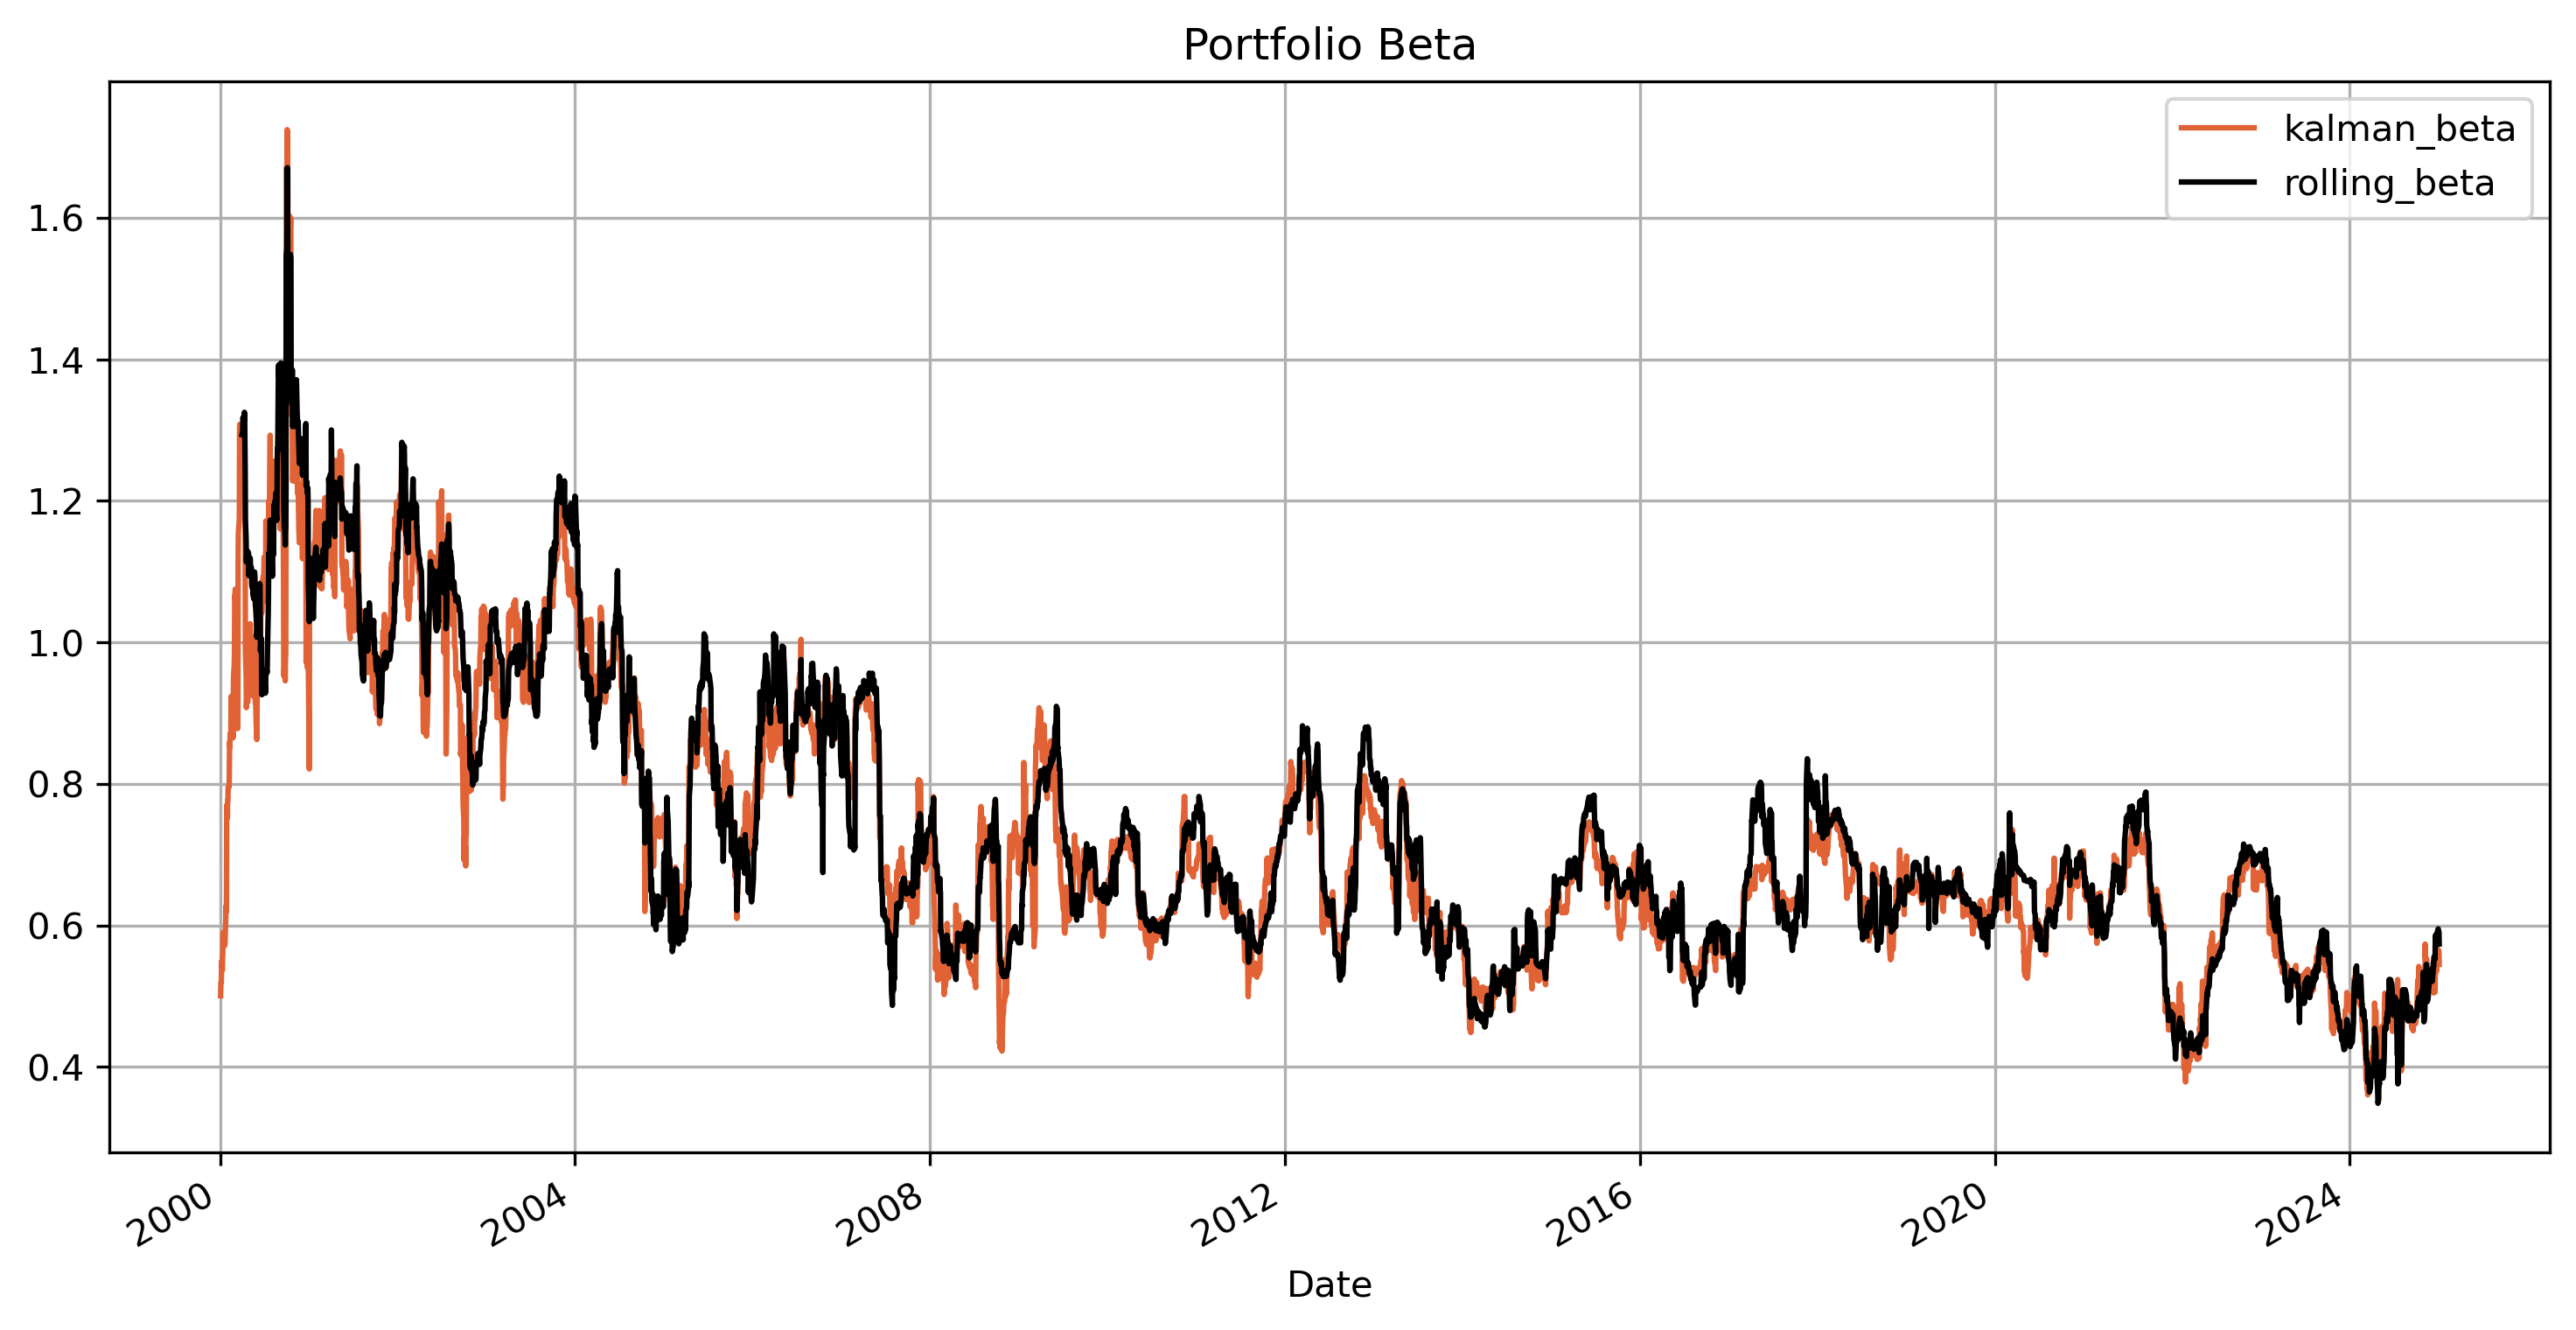

In [10]:
portfolio_betas = pd.concat([portfolio_kalman_beta, portfolio_rolling_beta], axis=1)
portfolio_betas.plot(grid=True, title="Portfolio Beta")

Text(0, 0.5, 'Beta')

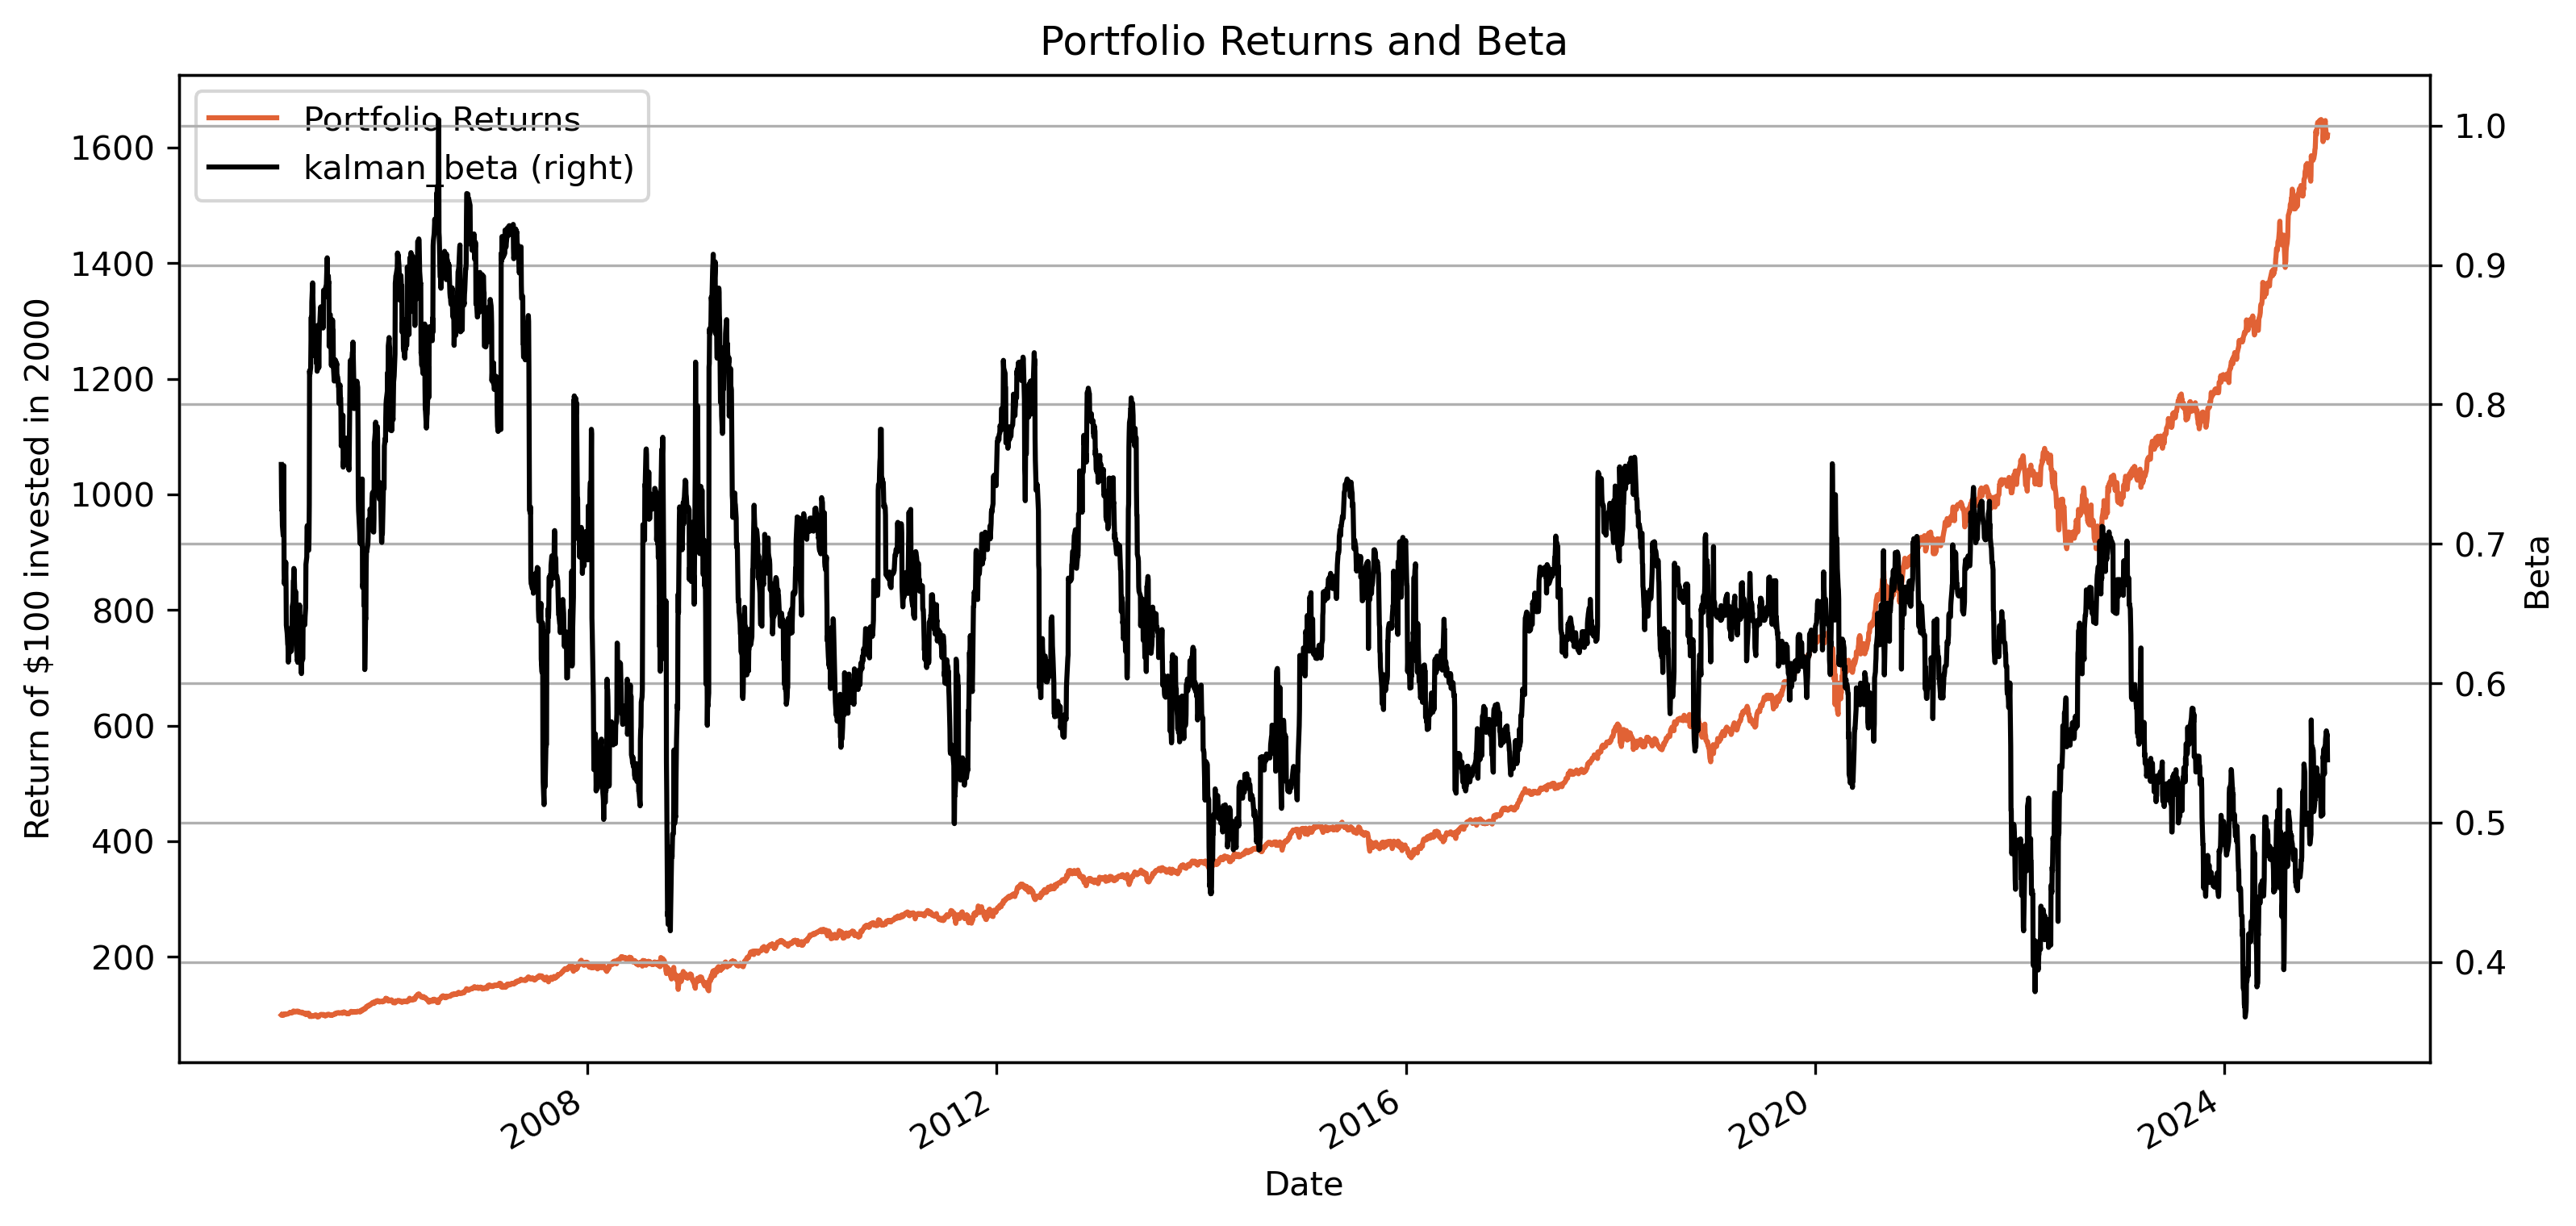

In [11]:
ax = (
    pd.concat([cumulative_returns, portfolio_kalman_beta], axis=1)
    .loc['2005':]
    .dropna()
    .plot(
        secondary_y="kalman_beta",
        grid=True,
        title="Portfolio Returns and Beta"
    )
)
ax.set_ylabel("Return of $100 invested in 2000")
ax.right_ax.set_ylabel("Beta")

## This is our equally weighted portfolio return by itself, besides its own beta

- We see almost 16x returns for the portfolio
- Do you think shorting our own beta will do much damage?
- Remember we'll be shorting the S&P 500 over a period of almost 20 years

In [12]:
kalman_hedged_returns = (
    (portfolio_returns - (portfolio_kalman_beta.shift(1)*sp500))
    .dropna()
    .rename("Kalman Beta Hedged Portfolio Returns")
)

ols_hedged_returns = (
    (portfolio_returns - (portfolio_rolling_beta.shift(1)*sp500))
    .dropna()
    .rename("Rolling OLS Beta Hedged Portfolio Returns")
)


<Axes: title={'center': 'Hedged Portfolio Returns'}, xlabel='Date'>

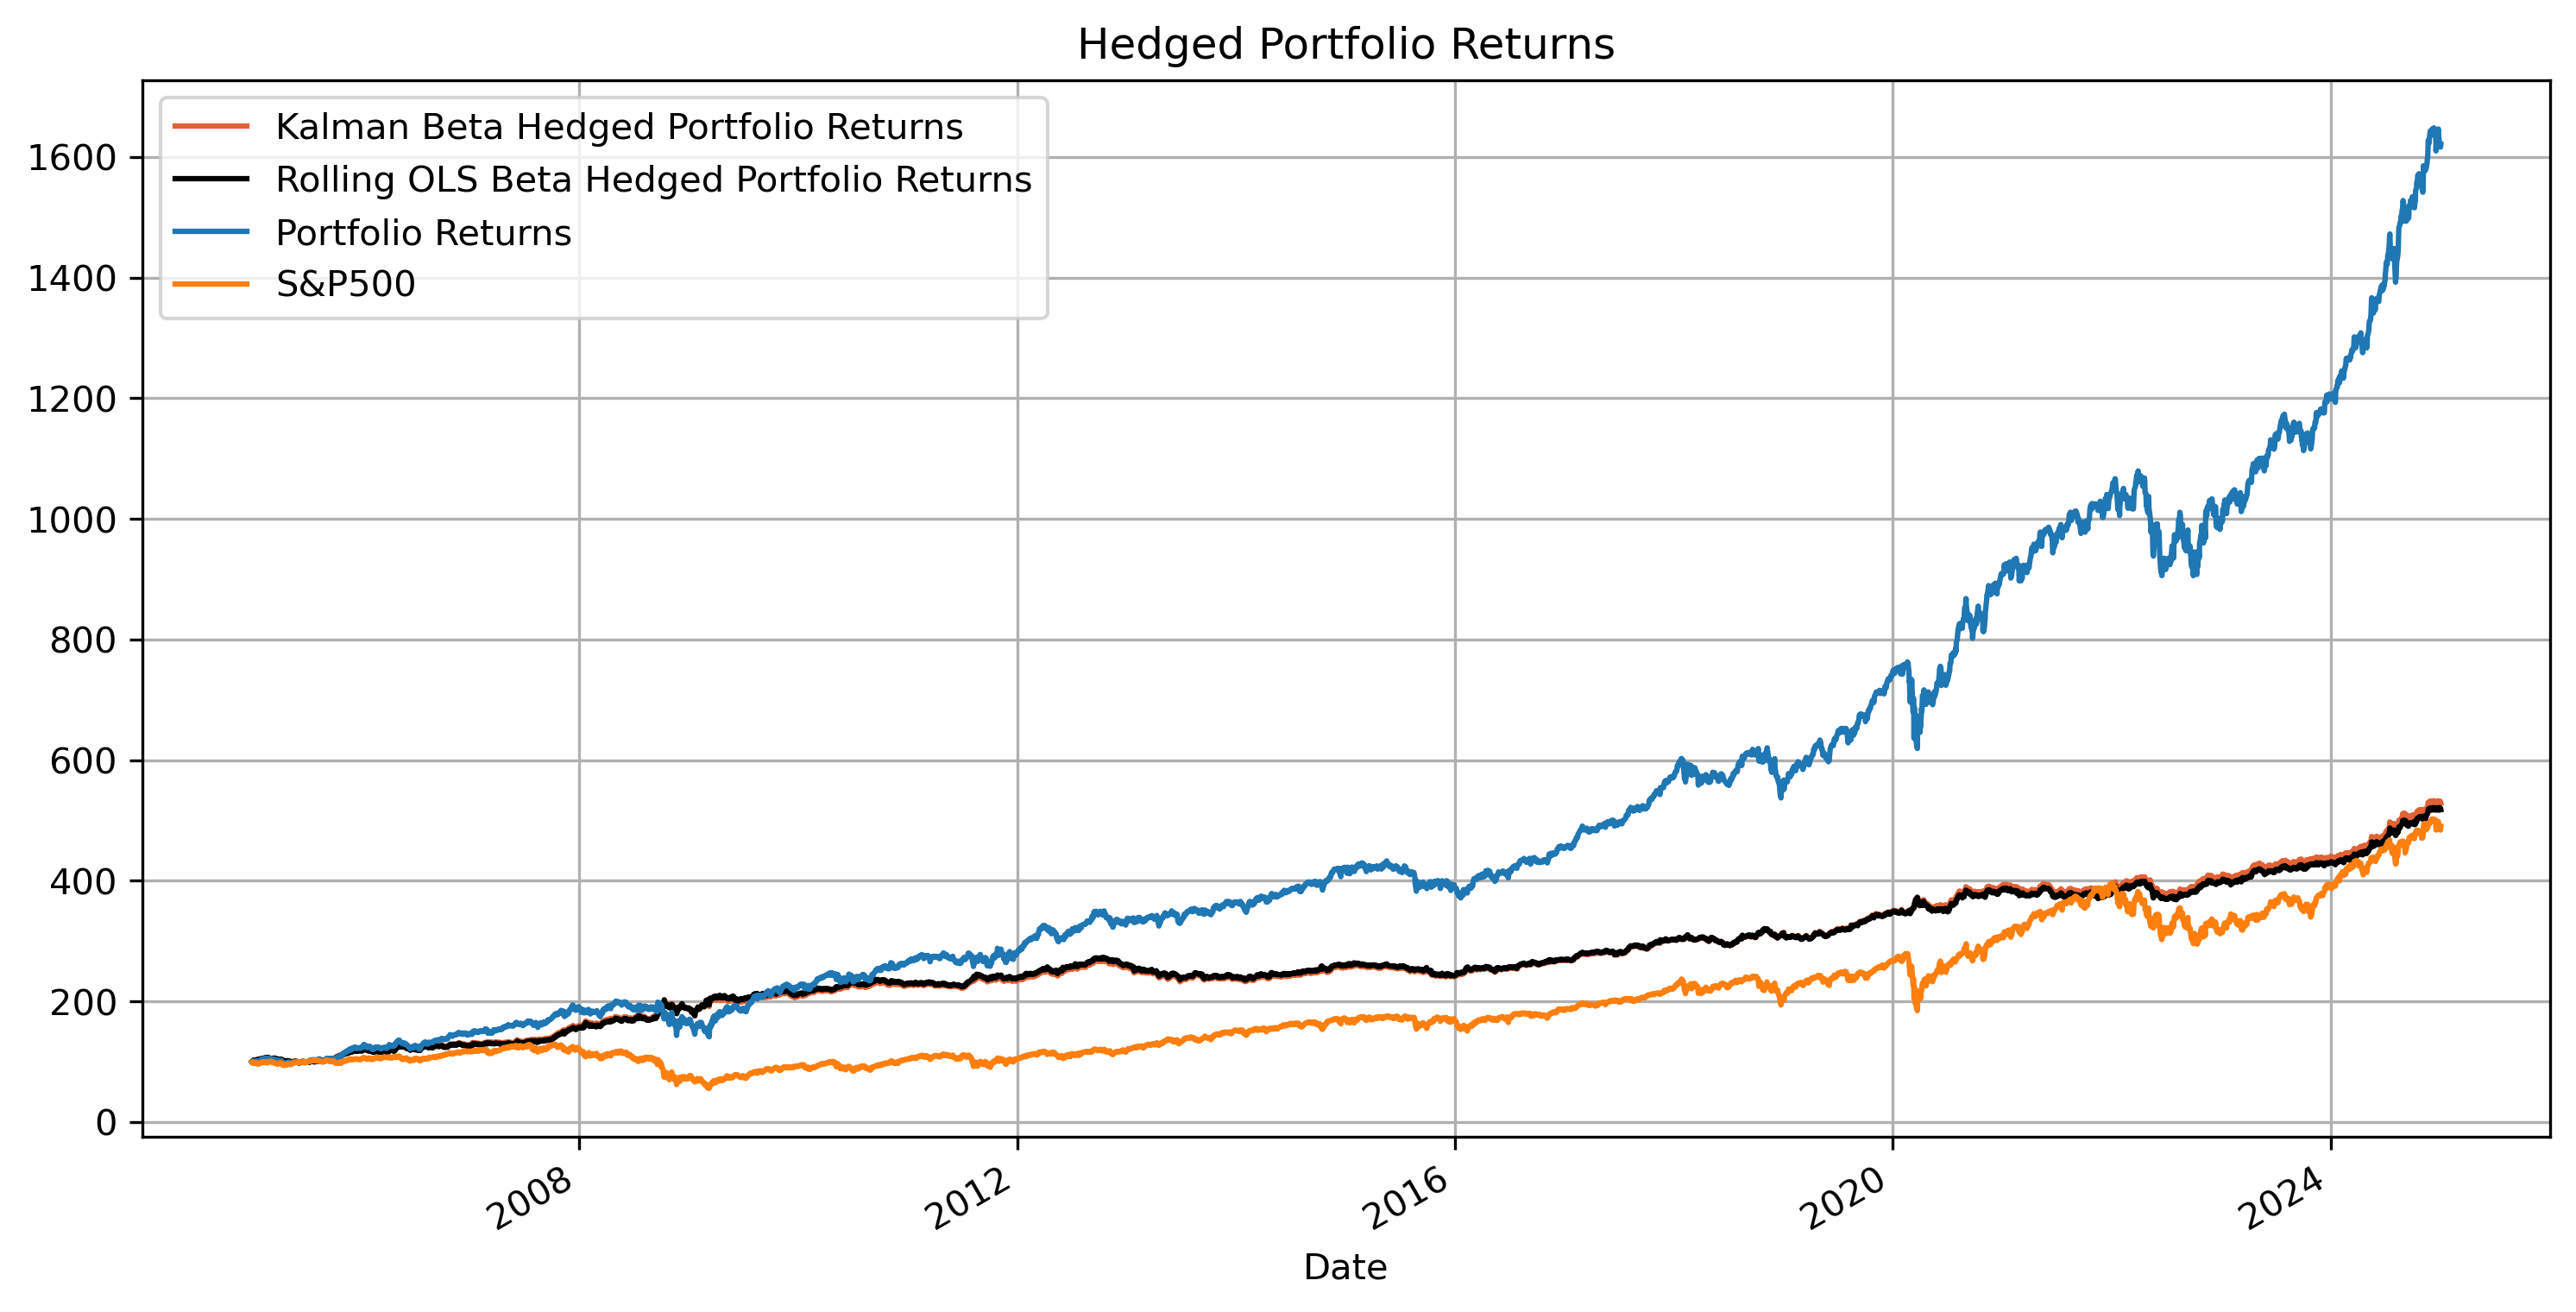

In [13]:
both_returns = (
    pd.concat([
            kalman_hedged_returns,
            ols_hedged_returns,
            portfolio_returns,
            sp500.rename('S&P500')
        ], 
        axis=1
    )
    .dropna()
)

(
    both_returns
    .loc['2005':]
    .add(1)
    .cumprod()
    .mul(100)
    .plot(grid=True, title="Hedged Portfolio Returns")
)

## Ouch! We reduced our accumulated returns from 16x to roughly 5.5x over the same period

- But look at how smooth the beta hedged series are!
- That means we have a lot less volatility (risk)
- And with essentially 0 beta, besides, they still beat the S&P
- Let's dive deeper...

In [14]:

corr = both_returns.corr()
corr.columns.name = "Correlation Matrix"
names = ['Kalman Filter', 'Rolling OLS', 'Portfolio', 'S&P500']
corr.columns = names
corr.index = names
corr.style.background_gradient(cmap='viridis').format("{:.2%}")


- The correlation between the hedged series and the S&P is **near 0**

In [15]:
## Dirt cheap basic metrics function lol
def compute_metrics(
    df_returns: pd.DataFrame,
    freq: int = 252,
    risk_free_rate: float = 0.02,
    var_level: float = 0.05
) -> pd.DataFrame:
    ann_returns = (1 + df_returns).prod() ** (freq / df_returns.shape[0]) - 1
    cum_ret = (1 + df_returns).cumprod()
    running_max = cum_ret.cummax()
    drawdown = (cum_ret - running_max) / running_max
    max_dd = drawdown.min()
    hit_ratio = (df_returns > 0).sum() / df_returns.count()
    var = df_returns.quantile(var_level)
    ann_std = df_returns.std() * np.sqrt(freq)
    daily_rfr = (1 + risk_free_rate)**(1 / freq) - 1
    excess = df_returns.sub(daily_rfr, axis=0)
    sharpe_whole = excess.mean() / excess.std()
    return pd.DataFrame({
        'Annualized Return': ann_returns,
        'Max Drawdown': max_dd,
        'Hit Ratio': hit_ratio,
        f'VaR ({int((1 - var_level)*100)}%)': var,
        'Annualized Vol': ann_std,
        'Sharpe (Whole Series)': sharpe_whole
    })
    
metrics_df = compute_metrics(both_returns.loc['2010':])

In [16]:
metrics_df.style.format("{:.2%}")

# Key takeaways


- "Raw" Portfolio: ~14% annualized return with an ~19% max drawdown.
- S&P 500: ~12% annualized return, but a heftier ~34% max drawdown.
- Kalman Beta Hedged & Rolling OLS Beta Hedged: Both land around 6% annual returns, with ~13–14% max drawdowns and volatility around 5–6%.

- Compare that to the S&P 500’s ~17% volatility and ~34% drawdown, or the unhedged portfolio’s ~12% volatility and ~19% drawdown and you start to understand how this goes.

## Leverage: The Key Variable

If your beta‐hedged strategy has positive alpha, you can lever it up to match your preferred volatility target—potentially earning a higher absolute return while still keeping market risk in check.

Steps:
    Neutralize market beta → reduce big drawdowns.
    Adjust leverage to reach the desired volatility.

Caveat: Real‐world considerations like transaction costs and liquidity constraints matter.

## Conclusion

  - Beta‐Hedged: Lower drawdowns and volatility, but also lower raw returns.
  - Unhedged + Market: Higher returns, higher risk.
  - Leverage: May let you boost returns on a hedged core if the alpha is real and costs are manageable.

----

### Extra: checking the beta of the beta-hedged series

- Do we really have 0 (or near-0) beta? Let's Check!
- Well, on average, yes:

In [17]:
kalman_beta_hedged_beta = kalman_beta(sp500, kalman_hedged_returns, x0=0).dropna(how="all").rename('Kalman')
ols_beta_hedged_beta = rolling_ols_beta(sp500, ols_hedged_returns, window=63).squeeze().rename('Rolling OLS')

residual_betas = pd.concat([kalman_beta_hedged_beta, ols_beta_hedged_beta], axis=1)

100%|██████████| 1/1 [00:00<00:00, 49.95it/s]


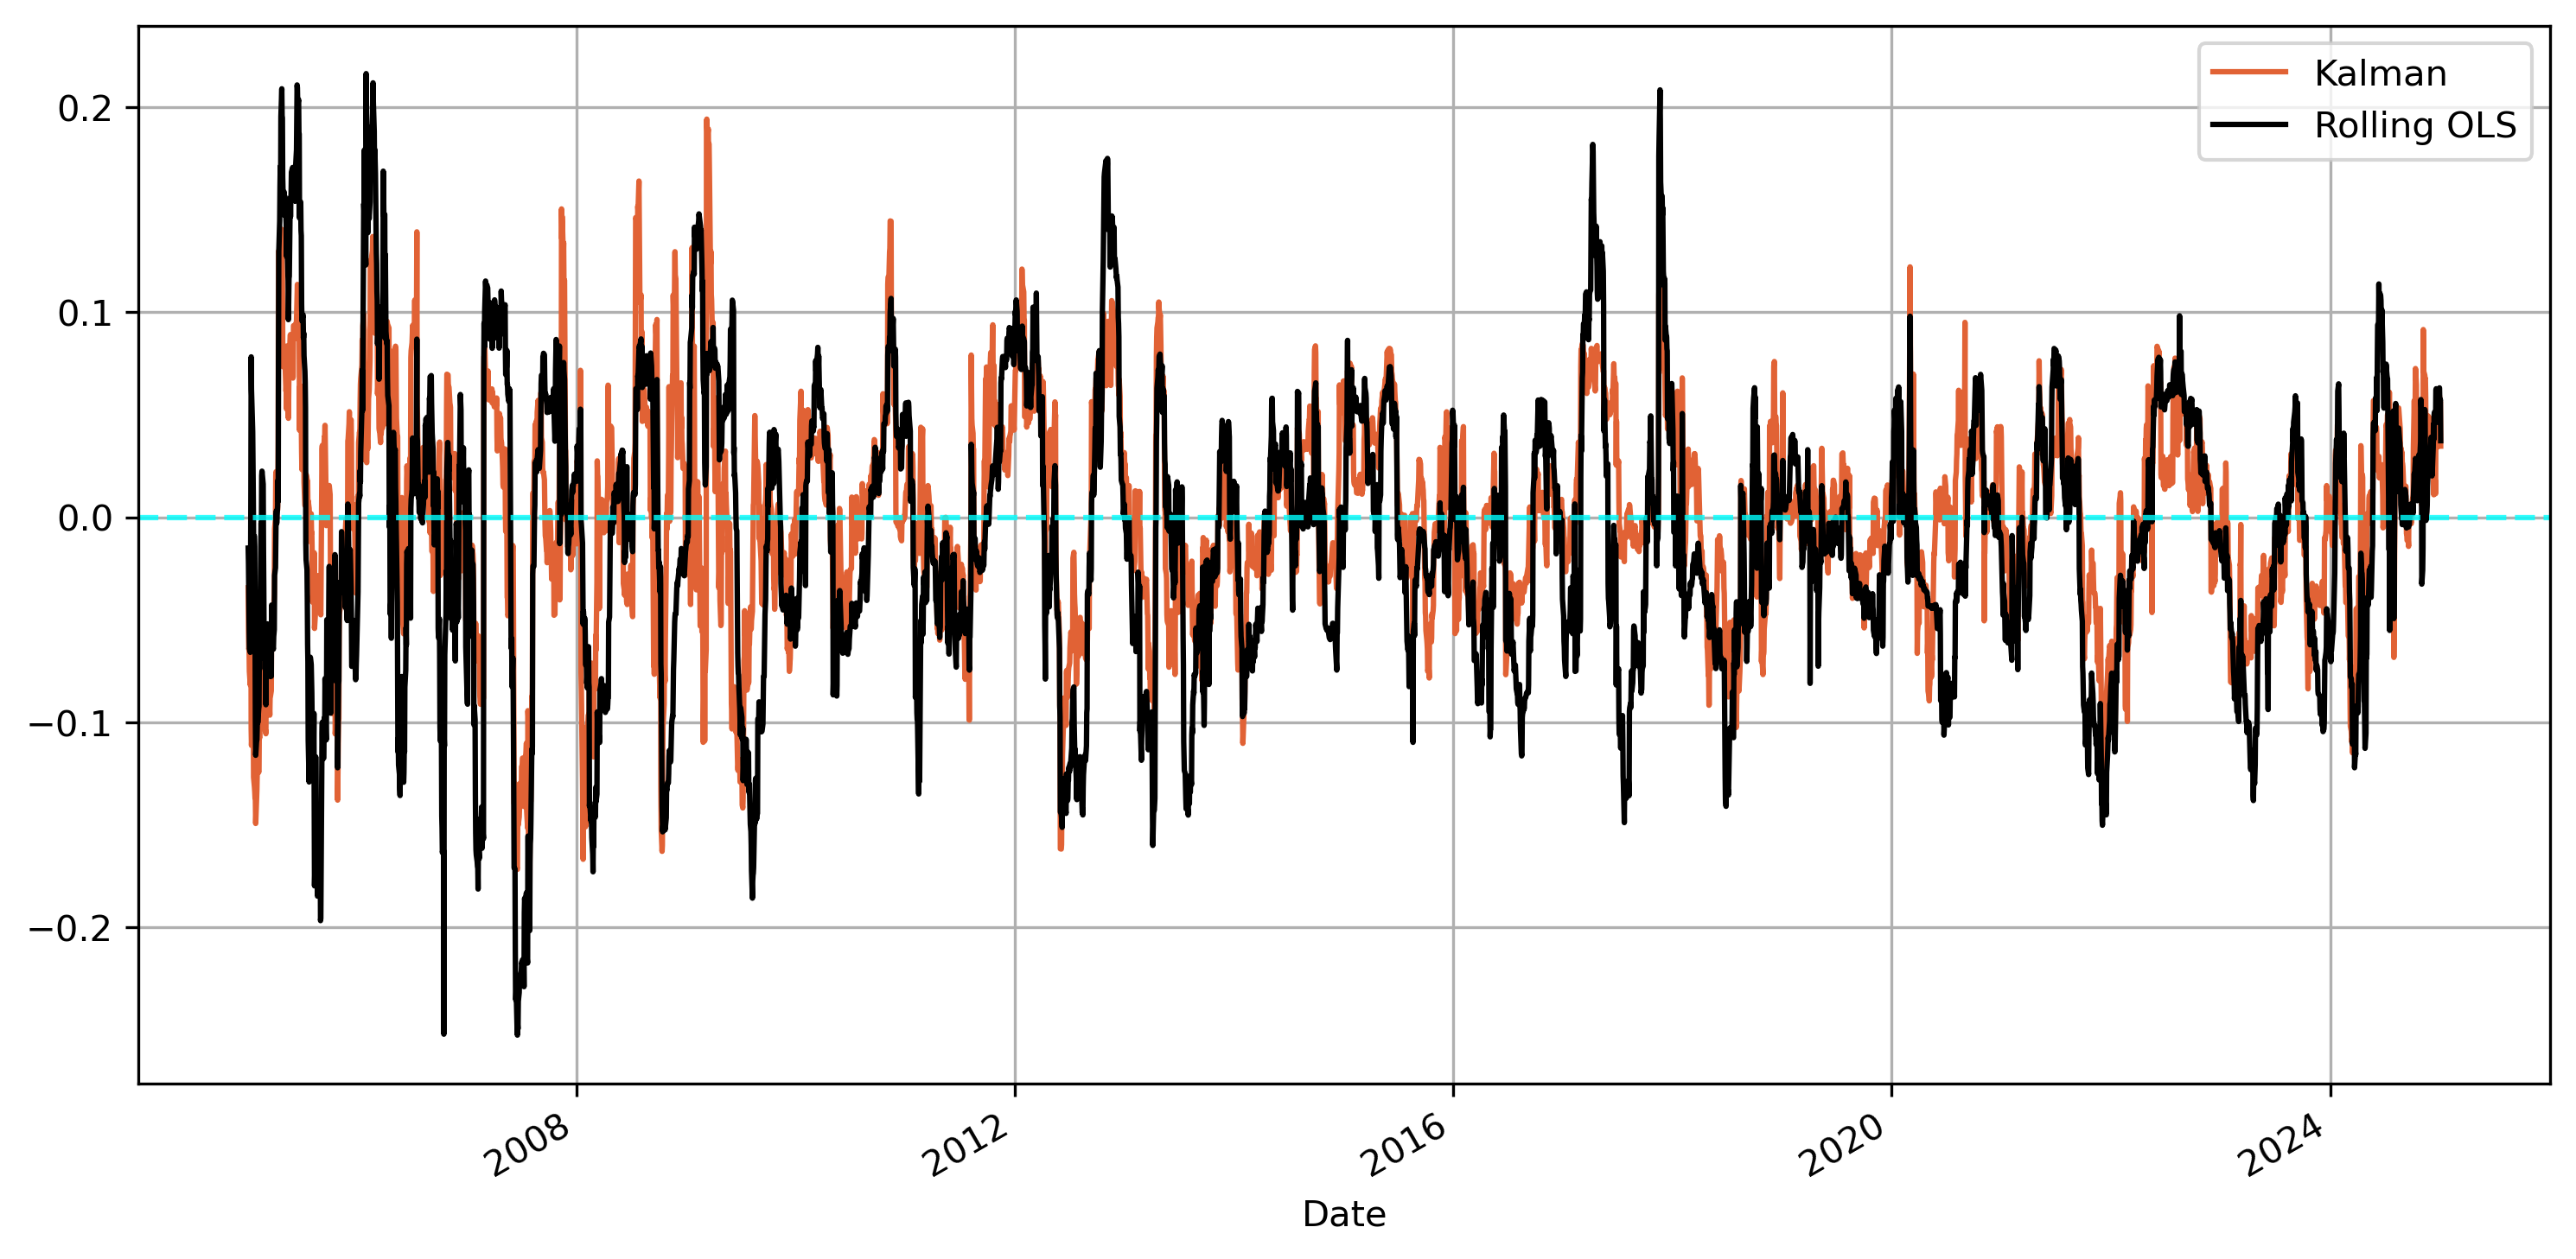

In [18]:
from matplotlib.pyplot import axhline

residual_betas.loc['2005':].dropna().plot(grid=True)
axhline(y=0.0, color='cyan', linestyle='--', alpha=0.8)

In [19]:
residual_betas.dropna().loc['2005':].describe()


Kalman  Rolling OLS
count  5035.000000  5035.000000
mean      0.000381    -0.010093
std       0.049358     0.068121
min      -0.188799    -0.252411
25%      -0.029067    -0.053065
50%       0.001003    -0.010436
75%       0.031583     0.034078
max       0.194181     0.216385

#### Our resulting beta series are noisy, but our mean beta is very close to 0

- In this case, the Kalman FIlter method yielded a better result to neutralize beta
- Rolling OLS doesn't fall too short, though.